<a href="https://colab.research.google.com/github/sartamang/git2/blob/master/opencv_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
!git clone https://github.com/DatumLearning/Faster_RCNN_Opencv.git

fatal: destination path 'Faster_RCNN_Opencv' already exists and is not an empty directory.


In [108]:
import numpy as np
import random
import time
import cv2
import os
from google.colab.patches import cv2_imshow

In [109]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [110]:
weightsPath = "/content/Faster_RCNN_Opencv/frozen_inference_graph.pb"
configPath = "/content/Faster_RCNN_Opencv/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [111]:
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

In [112]:
image = cv2.imread("/content/Faster_RCNN_Opencv/produce.png")
(H, W) = image.shape[:2]

In [113]:
blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)

In [114]:
net.setInput(blob)

In [115]:
boxes = net.forward(["detection_out_final"])

In [116]:
output = boxes[0].squeeze()

In [117]:
output

array([[0.0000000e+00, 5.1000000e+01, 9.8759472e-01, 9.1805011e-03,
        3.1419307e-01, 4.9265897e-01, 7.8838176e-01],
       [0.0000000e+00, 5.2000000e+01, 9.5909464e-01, 6.4296663e-01,
        4.6215504e-01, 9.9010646e-01, 9.2148417e-01],
       [0.0000000e+00, 5.4000000e+01, 9.5515805e-01, 4.8595536e-01,
        2.1711844e-01, 7.3181677e-01, 5.5613112e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0

In [118]:
output[: , 2][:5] , output[: , 1][:5]

(array([0.9875947 , 0.95909464, 0.95515805, 0.        , 0.        ],
       dtype=float32),
 array([51., 52., 54.,  0.,  0.], dtype=float32))

In [119]:
output[: , 3:][:5]

array([[0.0091805 , 0.31419307, 0.49265897, 0.78838176],
       [0.6429666 , 0.46215504, 0.99010646, 0.9214842 ],
       [0.48595536, 0.21711844, 0.73181677, 0.5561311 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]], dtype=float32)

In [120]:

confidence_threshold = 0.3
indices = np.argwhere(output[:, 2] > confidence_threshold).flatten()


In [121]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [122]:
img = cv2.imread("/content/Faster_RCNN_Opencv/produce.png")
if img is None:
    print("Error: Could not read the image.")
else:
    for i in indices:
      x1n , y1n , x2n , y2n = output[i , 3:]
      x1 = int(x1n * W)
      y1 = int(y1n * H)
      x2 = int(x2n * W)
      y2 = int(y2n * H)
      img = cv2.rectangle(img , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 3)
      class_name = coco_names[int(output[i , 1])]
      img = cv2.putText(img , class_name , (x1 , y1 - 10) , font , 0.5 ,
                        (255 , 0 , 0) , 1 , cv2.LINE_AA)

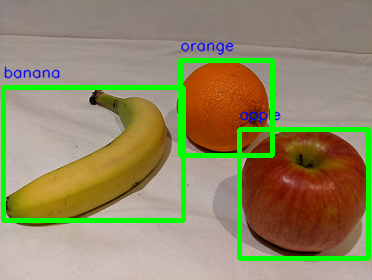

In [123]:
cv2_imshow(img)